<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/gasvaluechain/useOfNaturalGas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use of natural gas (history, present and future)

Natural gas is a fossil fuel that has been used for heating and cooking for centuries. Here is a brief overview of the history, present, and future of natural gas use:

##History:

The first recorded use of natural gas dates back to ancient Persia, where it was used to boil water and create fire for religious ceremonies.
In the 19th century, natural gas was used as a lighting source in the United States, with the first gas pipeline being built in 1816 in Baltimore.
The use of natural gas for heating and cooking became more widespread in the 20th century, with the development of gas distribution systems and the discovery of large natural gas reserves in North America and elsewhere.

##Present:

Natural gas is now used for a variety of purposes, including heating and cooking in homes and businesses, generating electricity in power plants, and as a feedstock for chemical and manufacturing processes.
According to the International Energy Agency, natural gas accounted for 23% of global energy consumption in 2020.
The largest natural gas producers are the United States, Russia, and Iran, with significant production also occurring in other countries such as Canada, China, and Qatar.

##Future:
Natural gas is expected to continue to play an important role in the global energy mix in the coming decades.
The International Energy Agency projects that global natural gas demand will continue to grow, although at a slower rate than in the past, with increasing competition from renewable energy sources.
There is also growing interest in the use of natural gas as a lower-carbon alternative to coal and oil in power generation and transportation, although this will require the use of technologies such as carbon capture and storage to reduce emissions.
However, there are concerns about the environmental impacts of natural gas production and use, including methane emissions during production and transportation, and the potential for leaks and accidents. As a result, there is a need to ensure that natural gas is produced and used in a sustainable and responsible way.

Natural gas meets about 24 % of total world energy demand, and thus, like oil, plays a very important part in meeting global energy needs. Natural gas has accounted for almost one third of the world's energy consumption growth during the last decade, and the use of natural gas is expected to increase in the future as well. Natural gas is used mainly for heating homes and commercial buildings, cooking and power generation and in the petrochemical industry.

https://yearbook.enerdata.net/total-energy/world-consumption-statistics.html

https://en.wikipedia.org/wiki/Natural_gas

https://htt.io/natural-gas-past-present-future/


# 

#History

##Production

###World
* https://yearbook.enerdata.net/natural-gas/world-natural-gas-production-statistics.html

###Norway
* https://www.norskpetroleum.no/en/framework/norways-petroleum-history/
* https://www.norskpetroleum.no/en/production-and-exports/production-forecasts/
* https://www.norskpetroleum.no/en/facts/field/
* https://www.npd.no/en/facts/

##Consumption

* https://yearbook.enerdata.net/natural-gas/gas-consumption-data.html


#Analysis in Python


In [ ]:
%%capture
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import urllib
import urllib.request
import pandas as pd
%matplotlib inline

from matplotlib.pyplot import figure

figure(figsize=(18, 16), dpi=80)

# Analyse production data from NCS
In the following example we will do a simple analysis of production data from the Norwegian Continental Shelf.

Data:
https://www.norskpetroleum.no/en/production-and-exports/production-forecasts/

In [ ]:
url="https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_production_totalt_NCS_year__DisplayAllRows&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=143.97.2.35&CultureCode=en"
testfile = urllib.request.urlopen(url)
proddataF=pd.read_csv(testfile)
proddataF.head()

,prfYear,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3
0,2021,33.791,38.475,5.617,0.242,78.124,57.964
1,2020,98.390,112.296,16.767,1.282,228.735,169.419
2,2019,81.727,115.123,17.375,1.655,215.880,168.157
3,2018,86.269,122.203,19.457,1.714,229.643,173.389
4,2017,92.278,124.664,20.395,1.707,239.045,171.881


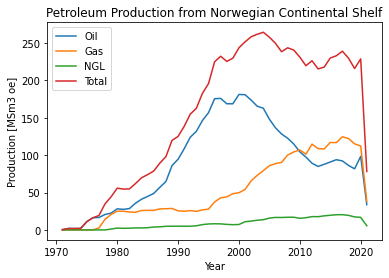

In [ ]:
proddata = proddataF.rename(columns={"prfPrdOilNetMillSm3": "Oil", "prfPrdGasNetBillSm3": "Gas", "prfPrdNGLNetMillSm3": "NGL", "prfPrdOeNetMillSm3": "Total"})
import matplotlib.pyplot as plt
plt.plot( 'prfYear', 'Oil', data=proddata)
plt.plot( 'prfYear', 'Gas', data=proddata)
plt.plot( 'prfYear', 'NGL', data=proddata)
plt.plot( 'prfYear', 'Total', data=proddata)
plt.ylabel('Production [MSm3 oe]')
plt.xlabel('Year')
plt.title("Petroleum Production from Norwegian Continental Shelf")
plt.legend()
plt.show()

#Norwegian oil/NGL export analysis
In the following exmaple we give an exmaple of a export analysis calculation using Python.

See:
https://www.norskpetroleum.no/en/production-and-exports/exports-of-oil-and-gas/

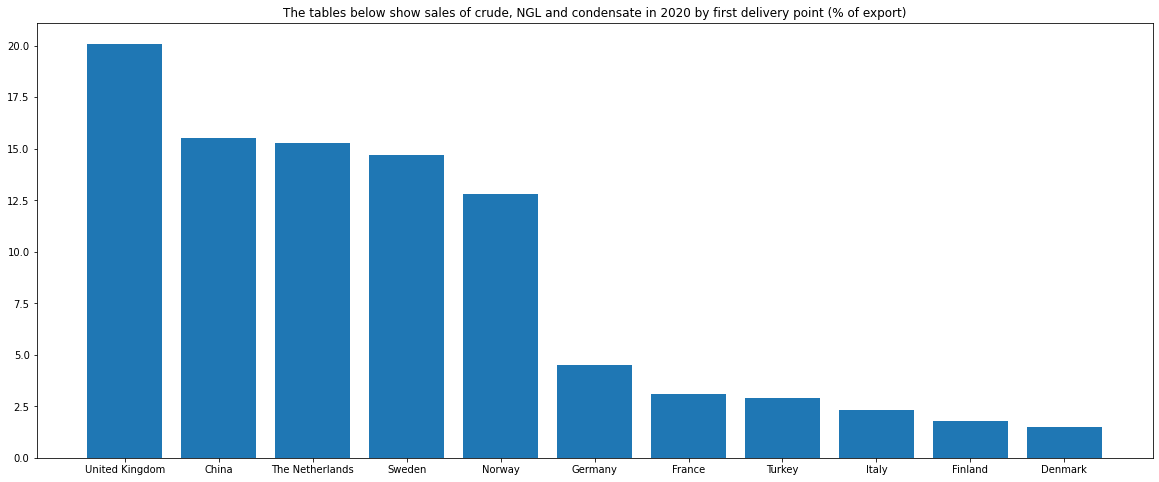

In [ ]:
import xlrd
url = 'https://www.norskpetroleum.no/wp-content/uploads/39-Oljeeksport-fordelt-pa-leveransepunkt-24032021.xlsx'
testfile = urllib.request.urlopen(url)
xlfile = xlrd.open_workbook(file_contents = testfile.read())
#workbook = xlrd.open_workbook(xlfile)
worksheet = xlfile.sheet_by_name('Fig-data')
expdata=pd.read_excel(xlfile, sheet_name='Fig-data')
country = expdata["Unnamed: 2"]
imports = expdata["Unnamed: 3"]
plt.title("The tables below show sales of crude, NGL and condensate in 2020 by first delivery point (% of export)")
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(country[22:33], imports[22:33]*100)
plt.show()

# Norwegian gas export analysis
Norwegian net gas exports in 2019 compared to other gas exporting countries

https://www.norskpetroleum.no/en/production-and-exports/exports-of-oil-and-gas/

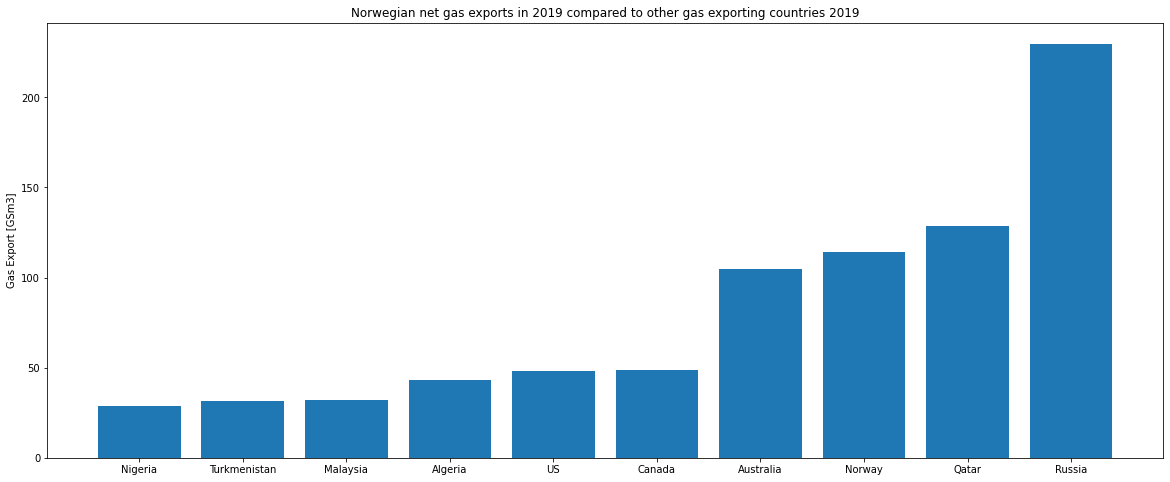

In [ ]:
import xlrd
url = 'https://www.norskpetroleum.no/wp-content/uploads/49_Norsk_netto_gasseksport_2019_-sammenliknet_med_andre_gasseksporterende_land_29062020.xlsx'
testfile = urllib.request.urlopen(url)
xlfile = xlrd.open_workbook(file_contents = testfile.read())
#workbook = xlrd.open_workbook(xlfile)
worksheet = xlfile.sheet_by_name('Fig-data')
expdata=pd.read_excel(xlfile, sheet_name='Fig-data')
country = expdata["Unnamed: 2"]
imports = expdata["Unnamed: 3"]
plt.title("Norwegian net gas exports in 2019 compared to other gas exporting countries 2019")
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(country[22:33], imports[22:33])
plt.ylabel('Gas Export [GSm3]')
plt.show()

# Norwegian natural gas exports in 2013-2019 by first delivery point


https://www.norskpetroleum.no/en/production-and-exports/exports-of-oil-and-gas/


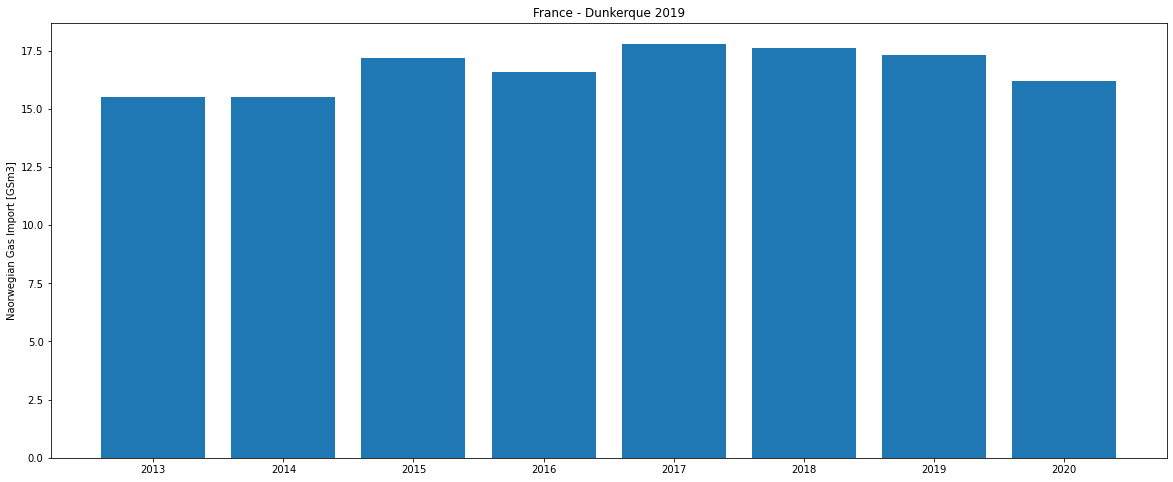

In [ ]:
import xlrd
url = 'https://www.norskpetroleum.no/wp-content/uploads/42-Norsk-naturgasseksport-fordelt-pa-leveransepunkt-24032021.xlsx'
testfile = urllib.request.urlopen(url)
xlfile = xlrd.open_workbook(file_contents = testfile.read())
worksheet = xlfile.sheet_by_name('Fig-data')
expdata=pd.read_excel(xlfile, sheet_name='Fig-data')
country = expdata["Unnamed: 2"]
imports = expdata["Unnamed: 3"]
plt.title("France - Dunkerque 2019")
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(country[22:30], imports[22:30])
plt.ylabel('Naorwegian Gas Import [GSm3]')
plt.show()